<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/homeworks/HW4_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 693, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 693 (delta 266), reused 216 (delta 205), pack-reused 383 (from 1)
Receiving objects: 100% (693/693), 9.15 MiB | 11.54 MiB/s, done.
Resolving deltas: 100% (394/394), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

**NOTE**
- Questions 1-10 use the WNBA dataset (**qs**)
- Questions 11-21 use the Massachusetts Mortgage Application Dataset
(**df**)
- Questions 22-25 test basic Python knowledge

In [3]:
qs = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')
df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')

<ipython-input-3-4cb1d2c3a676>:2: DtypeWarning: Columns (34,36,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')


### Question #1

`qs.shape[0]` corresponds to which of the following?

(A) The number of columns in the dataset

(B) The number of variables in the dataset

(C) The number of variables which are of type `str` in the dataset

**(D) The number of rows in the dataset**

(E) The number of variables which are of type `float` or `int`

### Question #2

What is the average number of offensive rebounds (**ORB**)?

(A) 3.16

(B) 12.1

(C) -0.5

**(D) 0.74**

(E) 1.3



In [7]:
qs['ORB'].mean()

0.7445054945054945

**Answer**:

### Question #3

Describe the **sign** of the relationship between points and assists?

**(A) Positively Correlated**

(B) Negatively Correlated

(C) Uncorrelated

(D) Weakly correlated

(E) Strongly correlated

In [10]:
qs['PTS'].corr(qs['AST']) > 0

True

### Question #4

Which variable has a weaker relationship with points compared to the relationship between assists and points?

(A) Turnovers (**TOV**)

(B) Minutes (**MP.1**)

(C) Rebounds (**TRB**)

**(D) Field Goal Percentage (FG%)**

(E) Free Throw Attemps (**FT**)

In [13]:
qs[['PTS', 'AST', 'TOV', 'MP.1', 'TRB', 'FG%', 'FT']].corr()

,PTS,AST,TOV,MP.1,TRB,FG%,FT
PTS,1.000000,0.692226,0.773895,0.918471,0.733047,0.283210,0.905224
AST,0.692226,1.000000,0.840130,0.771062,0.417108,0.140424,0.580892
TOV,0.773895,0.840130,1.000000,0.819517,0.604350,0.179236,0.704964
MP.1,0.918471,0.771062,0.819517,1.000000,0.740560,0.277963,0.792530
TRB,0.733047,0.417108,0.604350,0.740560,1.000000,0.336023,0.698835
FG%,0.283210,0.140424,0.179236,0.277963,0.336023,1.000000,0.184548
FT,0.905224,0.580892,0.704964,0.792530,0.698835,0.184548,1.000000


### Question #5

Looking at a scatter plot of Three Point Percentage and Two Point Percentage, are there outliers in the data?

(A) No, all the data is closely clumped together

(B) Yes, all the data is closely clumped together

**(C) Yes, but only with respect to 3P%**

(D) Yes, but only with respect to **2P%**

**(E) Yes, there are outlier values in both 3P% and 2P%**

**Note**: On the midterm the question would be a bit more exact. I think there are a couple of reasonable answers to this question.

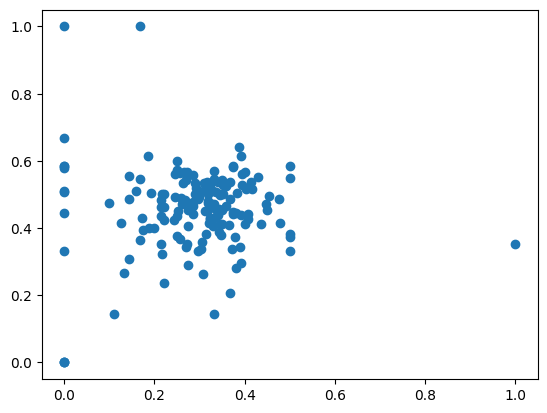

In [16]:
plt.scatter(qs['3P%'], qs['2P%'])
plt.show()

In [17]:
qs['3P%'].value_counts(bins=10)

,count
"(0.3, 0.4]",66
"(0.2, 0.3]",45
"(0.4, 0.5]",18
"(0.1, 0.2]",16
"(-0.002, 0.1]",14
"(0.9, 1.0]",1
"(0.5, 0.6]",0
"(0.6, 0.7]",0
"(0.7, 0.8]",0
"(0.8, 0.9]",0


In [18]:
qs['2P%'].value_counts(bins=10)

,count
"(0.4, 0.5]",71
"(0.5, 0.6]",52
"(0.3, 0.4]",27
"(0.2, 0.3]",8
"(-0.002, 0.1]",7
"(0.6, 0.7]",6
"(0.9, 1.0]",5
"(0.1, 0.2]",3
"(0.7, 0.8]",0
"(0.8, 0.9]",0


**Answer**:

### Question #6

The relationship between minutes played per game (**MP.1**) and free throw attempts (**FTA**) can be described as which of the following?

> A linear relationship is when two variables are connected in such a way that if one variable changes, the other changes by a consistent amount. If you plot this relationship on a graph, the points form a straight line. For example: If you earn \$10 for every hour you work, then for each additional hour, you will always earn an extra \$10. The more hours you work, the more money you make, and this increase follows a steady, predictable pattern.

(A) linear

**(B) non-linear**

(C) symmetric

(D) bi-modal

(E) uniform

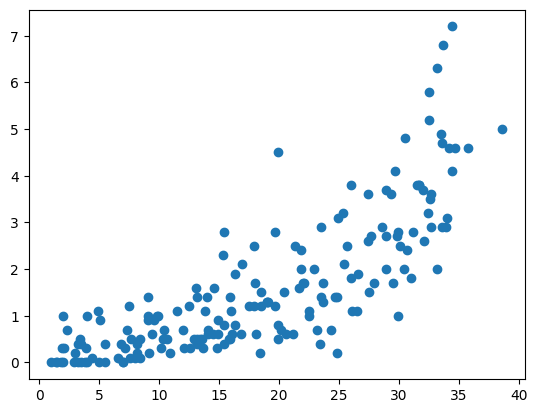

In [19]:
plt.scatter(qs['MP.1'], qs['FTA'])
plt.show()

### Question #7

Explain the relationship between points and the dispersion of assists?

(A) Constant

**(B) Increasing**

(C) Decreasing

(D) No Relationship

(E) Symmetric

In [25]:
qs['PTS_partitioned'] = pd.cut(qs['PTS'], bins=5)
data = qs.groupby('PTS_partitioned')['AST'].std().sort_index()
data

<ipython-input-25-2da977264259>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = qs.groupby('PTS_partitioned')['AST'].std().sort_index()


,AST
PTS_partitioned,
"(-0.0269, 5.38]",0.751445
"(5.38, 10.76]",1.460599
"(10.76, 16.14]",1.616838
"(16.14, 21.52]",1.712920
"(21.52, 26.9]",1.646208


**Answer**

### Question #8

The distribution of Two Point Percentage (**2P%**) for players who play at least 15 minutes per game is

**(A) Symmetric, unimodal**

(B) Skew  left

(C) Skew right

(D) Uniform

(E) Bimodal

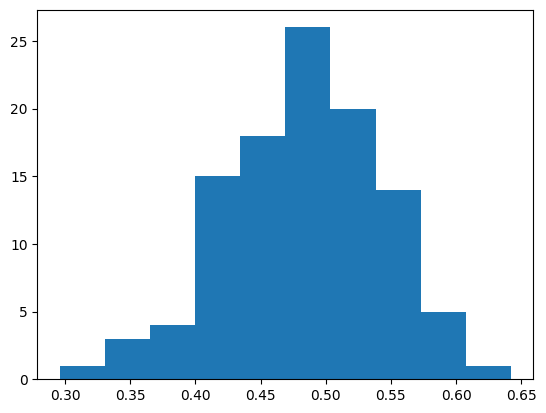

In [26]:
condition = qs['MP.1'] >= 15
new_qs = qs[condition]
plt.hist(new_qs['2P%'])
plt.show()

### Question #9

The distribution of Field Goal Percentage (**FG%**) for players who play at least 25 games (**G**) and average at least 0.1 Free Throw Attempts per game (**FTA**).

**(A) Symmetric, unimodal**

(B) Skew left

(C) Skew right

(D) Uniform

(E) Bimodal

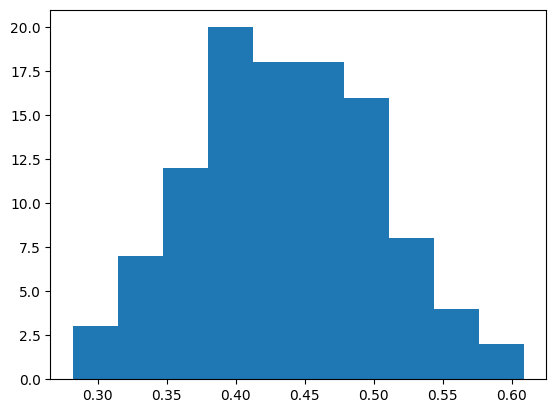

In [28]:
condition = (qs['G'] >= 25) & (qs['FTA'] >=0.1)
new_qs = qs[condition]
plt.hist(new_qs['FG%'])
plt.show()

**Answer**

### Question #10

The following line of code does which of the following?

**Code**: `qs.groupby('Pos')['AST'].mean().sort_values()`

(A) Randomly shuffles the rows of the DataFrame

(B) Throws an error because we didn't tell Python which variable to sort by

(C) Creates a DataFrame

(D) Partitions the data by Assists and then computes the average position within each bin, sorting from lowest to highest.

**(E) Partitions the data by Position and then computes the average assist within each position, sorting from lowest to highest.**

In [29]:
qs.groupby('Pos')['AST'].mean().sort_values()

,AST
Pos,
C-F,0.833333
F-C,0.866667
C,1.288235
G-F,1.387500
F,1.450847
F-G,1.733333
G,2.486747


**Answer**

### Question #11

The variables `loan_type_name` and `loan_amount_000s` are which of the following?

**Note**: Two continuous variables can exhibit correlation, meaning they have a linear or statistical relationship. A categorical variable is said to be associated with a continuous variable if the average value of the continuous variable varies across the different categories of the categorical variable.

(A) Both continuous variables and strongly correlated

(B) Both categorical variables

**(C) Categorical and continuous respectively and associated**

(D) Continuous and categorical respectively and associated

(E) Categorical and continuous respectively and not associated

In [31]:
data_summary = df.groupby('loan_type_name')['loan_amount_000s'].agg(['mean', 'std'])
data_summary

,mean,std
loan_type_name,,
Conventional,348.566388,257.284548
FHA-insured,289.370604,112.811825
FSA/RHS-guaranteed,218.478488,64.071388
VA-guaranteed,319.351628,130.863462


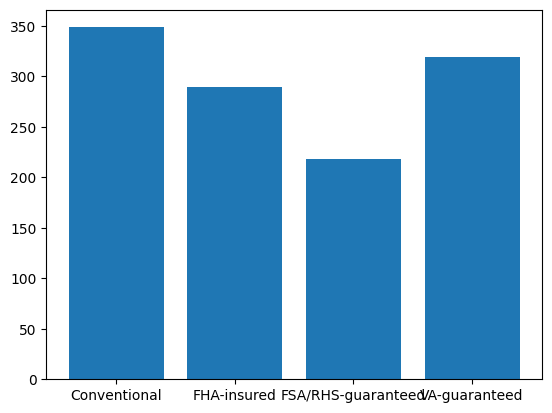

In [33]:
plt.bar(data_summary.index, data_summary['mean'])
plt.show()

### Question #12

The first column of the DataFrame generated by the following line of code tells us that most Hispanic or Latino applicants applied for which type of loans

**Code**: `pd.crosstab(index=df['loan_type_name'], columns=df['applicant_ethnicity_name'], normalize='columns')`

**(A) Conventional**

(B) FHA-insured

(C) FSA/RHS-guaranteed

(D) VA-guaranteed

(E) Not known

In [34]:
pd.crosstab(index=df['loan_type_name'], columns=df['applicant_ethnicity_name'], normalize='columns')

applicant_ethnicity_name,Hispanic or Latino,"Information not provided by applicant in mail, Internet, or telephone application",Not Hispanic or Latino,Not applicable
loan_type_name,,,,
Conventional,0.600025,0.841212,0.837920,0.905172
FHA-insured,0.357477,0.107534,0.110345,0.077586
FSA/RHS-guaranteed,0.004558,0.003142,0.006373,0.008621
VA-guaranteed,0.037940,0.048111,0.045362,0.008621


### Question #13

Approximately what fraction of the mortgage applications are overseen by HUD and classified as conventional loans?

(A) 100%

(B) 0%

(C) 10%

(D) 20%

**(E) 30%**

In [36]:
condition = (df['agency_abbr'] == 'HUD') & (df['loan_type_name'] == 'Conventional')
new_df = df[condition]
print(new_df.shape[0] / df.shape[0])

0.3223856926191961


### Question #14

Approximately how many applications had income greater than $200K?

(A) 10,000

(B) 5,000

(C) 15,600

**(D) 17,200**

(E) 22,500

In [37]:
condition = df['applicant_income_000s'] > 200
new_df = df[condition]
new_df.shape[0]

17230

### Question #15

We want to create a table which shows the difference in the average loan amount between applicants earning at least \$200K and those earning less than \$200K?

**Code**:
```
df['More_than_200k'] = df['applicant_income_000s'].map(lambda x: #A)
df.groupby('More_than_200k')[#B].mean()
```

\#A and \#B should be replace with which of the following?

(A) `x`, `'More_than_200k'`

(B) `x - df['loan_amount_000s'].mean()`, `'loan_amount_000s'`

(C) `x > 300`, `'loan_amount_000s'`

**(D) `x < 200`, `'loan_amount_000s'`**

(E) `x- df['loan_amount_000s'].mean()`, `'More_than_200k'`

In [38]:
df['More_than_200k'] = df['applicant_income_000s'].map(lambda x: x < 200)
df.groupby('More_than_200k')['loan_amount_000s'].mean()

,loan_amount_000s
More_than_200k,
False,612.970676
True,288.544329


### Question #16

The folllowing line of code would be correct if

**code**: `df['loan_amount_000s', 'loan_purpose_name']`

(A) df was capitalized. All DataFrames must be capitalized

(B) `.loc` was used. As in, `df.loc['loan_amount_000s', 'loan_purpose_name']`

(C) The numbers of rows were specified. As in `df[:30, loan_amount_000s', 'loan_purpose_name']`

**(D) A pair of `[]` was added. As in `df[['loan_amount_000s', 'loan_purpose_name']]`**

(E) The comma was replaced with a semicolon. As in `df['loan_amount_000s'; 'loan_purpose_name']`

In [39]:
df[['loan_amount_000s', 'loan_purpose_name']]

,loan_amount_000s,loan_purpose_name
0,350,Home purchase
1,550,Home purchase
2,630,Refinancing
3,298,Refinancing
4,680,Refinancing
...,...,...
129886,346,Home purchase
129887,245,Refinancing
129888,92,Home purchase
129889,222,Refinancing


### Question #17

Specify how we could correct the following lines of code

**Incorrect Code**
```
condition = df['agency_abbr'] == 'HUD'
new_df = df['HUD']
```

(A) There should be only one equal sign in the first line. As in `condition = df['agency_abbr'] = 'HUD'`

(B) 'HUD' in the first line should be replaced with `FDIC` becuase 'HUD' is not a value of `agency_abbr`. As in `condition = df['agency_abbr'] = 'FDIC'`

(C) 'HUD' in the second line should be replaced with 'condition' because DataFrames can only be indexed by boolean strings. As in `new_df = df['condition']`

(D) The `_df` should be removed from `new_df` because ending variables names with `_df` is an invalid naming convention in Python. As in `new = df['HUD']`

**(E) 'HUD' in the second line should be replaced with `condition`. As in `new_df = df[condition]`**

In [42]:
condition = df['agency_abbr'] == 'HUD'
new_df = df[condition]
new_df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator,More_than_200k
0,2017,41-1795868,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,350,Preapproval was not requested,2,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Plymouth County,23.0,5117.01,Not Hispanic or Latino,2,Hispanic or Latino,1,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,Male,1,64.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4444.0,40.590000,94300.0,83.470001,1435.0,1724.0,NaN,True
3,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,298,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7502.00,"Information not provided by applicant in mail,...",3,No co-applicant,5,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,No co-applicant,5,130.0,Freddie Mac (FHLMC),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,7411.0,6.980000,84000.0,133.179993,2226.0,2679.0,NaN,True
4,2017,04-3243815,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,680,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7614.00,Hispanic or Latino,1,Hispanic or Latino,1,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,196.0,"Life insurance company, credit union, mortgage...",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6567.0,20.820000,84000.0,172.990005,1711.0,1883.0,NaN,True
5,2017,06-1297784,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,417,Not applicable,3,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Plymouth County,23.0,5306.00,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provi

### Question #18:

The following code doesn't do what the author intended. Can you spot the error?

```
condition = (df['loan_amount_000s'] >= 15)  & (df['applicant_income_000s'] >= 50)
new_df = df[condition]
plt.hist(new_df)
plt.show()
```

(A) Plotting is not allowed in Python.

(B) Continuous variables like `loan_amount_000s` and `'applicant_income_000s'` cannot be used to form a boolean index

(C) `condition` is not a boolean series

**(D) `plt.hist` cannot be called on a DataFrame**

(E) `&` should be replaced by `and`

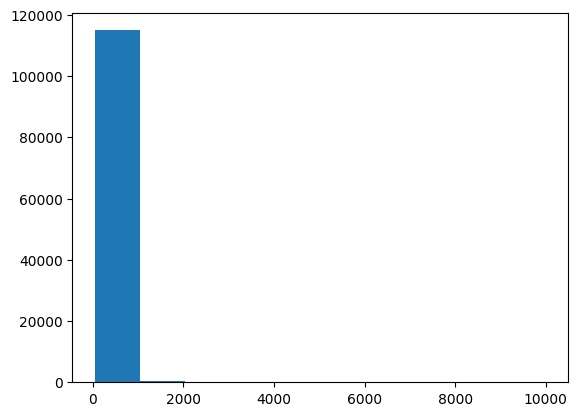

In [46]:
condition = (df['loan_amount_000s'] >= 15)  & (df['applicant_income_000s'] >= 50)
new_df = df[condition]
plt.hist(new_df['applicant_income_000s'])
plt.show()

### Question #19

The following line of code does which of the following?

```
df.sort_values('applicant_income_000s')
```

(A) Randomly samples from the DataFrame

(B) Drops the first 10 observations from the DataFrame

(C) Computes the standard deviation of `applicant_income_000s`

**(D) Sorts the DataFrame by `applicant_income_000s` from lowest to highest**

(E) Sorts the DataFrame by `applicant_income_000s` from highest to lowest

In [49]:
df.sort_values('applicant_income_000s')

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator,More_than_200k
114191,2017,0000008663,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,274,Not applicable,3,Loan originated,1,"Providence, Warwick - RI, MA",39300.0,Massachusetts,MA,25,Bristol County,5.0,6533.01,Not Hispanic or Latino,2,No co-applicant,5,Asian,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,1.0,"Commercial bank, savings bank or savings assoc...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,5237.0,9.570000,74500.0,109.440002,1674.0,2091.0,NaN,True
55461,2017,0000008663,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,150,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7001.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,No co-applicant,5,1.0,Fannie Mae (FNMA),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6160.0,3.330000,84000.0,131.070007,2056.0,2704.0,NaN,True
125346,2017,0000852218,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,284,Not applicable,3,Loan originated,1,Barnstable Town - MA,12700.0,Massachusetts,MA,25,Barnstable County,1.0,103.06,Not Hispanic or Latino,2,Not Hispanic or Latino,2,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,1.0,Freddie Mac (FHLMC),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,2948.0,6.210000,90200.0,82.070000,1119.0,3203.0,NaN,True
63978,2017,0000886204,Federal Reserve System,FRS,2,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,364,Not applicable,3,Loan originated,1,"Cambridge, Newton, Framingham - MA",15764.0,Massachusetts,MA,25,Middlesex County,17.0,3838.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,No co-applicant,5,1.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,5192.0,20.090000,104800.0,113.760002,1914.0,198

**Answer**:

### Question #20

Conventional loans are which of the following in the mortgage dataset?

(A) Under-represented

(B) Over-represented

(C) Fairly-represented

(D) Have a bimodal distribution

(E) Skew Left

**Answer**:

### Question #21

The 50$^{th}$ percentile of `loan_amount_000s` is roughly equal to which of the following percentiles of `applicant_income_000s`?

(A) 10$^{th}$ percentile

(B) 50$^{th}$ percentile

(C) 75$^{th}$ percentile

(D) 85$^{th}$ percentile

(E) 95$^{th}$ percentile

**Answer**:

### Question #22

What will the following function `check_speed(sprinter_speed)` print if it is called with sprinter_speed = 10.1?

```
def check_speed(sprinter_speed):
  if sprinter_speed < 9.58:
    print("You are faster than Usain Bolt")
  if sprinter_speed < 9.79:
    print("You are fast than Noah Lyes")
  elif sprinter_speed < 9.91:
    print("You are faster than Oblique Seville")
```

(A) “You are faster than Usain Bolt”

(B) “You are faster than Noah Lyes”

(C) "You are faster than Oblique Seville"

(D) Nothing

(E) “You are faster than Usain Bolt”
“You are faster than Noah Lyes”

**Answer**:

### Question #23

Given the following list

`my_list = ['cars', 'boats', 'flipflops', 'airplanes', 'night', 'moon']`

Which of the following is equivalent to `my_list[1:-1]`

(A) `my_list[:-1]`

(B) `my_list[2]`

(C) `my_list[-5:5]`

(D) `my_list[2,3,4,5]`

(E) `my_list`

**Answer**:

### Question #24

Which of the following would improve the code below:

```
def greet(name):
    return "Hello" + name + "!"
```

(A) Replace `+` with `,` in the return statement.

(B) Remove the parentheses from the function definition.

(C) Replace `def` with `lambda`. `lambda` is more efficient

(D) Replace `"Hello"` with `"Hello "`

(E) Change the Double Quotes to Single Quotes.



**Answer**:

### Question #25

The following code will show which of the following:

```
x = 5
y = 10
x, y = y, x
print(x, y)
```

(A) `5 10`

(B) `510`

(C) `55`

(D) `10 5`

(E) `105`

**Answer**: